## Observations and Insights 

In [144]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_merge = pd.merge(mouse_metadata,study_results,on="Mouse ID")
# Display the data table for preview
mouse_study_merge

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [145]:
# Checking the number of mice.
mouse_study_merge["Mouse ID"].value_counts()

g989    13
j984    10
g791    10
q511    10
m957    10
        ..
n482     1
v199     1
x226     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [146]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_group = mouse_study_merge.groupby(["Mouse ID"])["Timepoint"].value_counts()
mouse_group_df = pd.DataFrame({"Mouse Count": mouse_group})
mouse_group_df = mouse_group_df.reset_index()
mouse_group_df = mouse_group_df.sort_values(by="Mouse Count", ascending=False)
mouse_dup = mouse_group_df.loc[mouse_group_df["Mouse Count"] > 1]
mouse_dup

,Mouse ID,Timepoint,Mouse Count
590,g989,20,2
589,g989,15,2
588,g989,10,2
587,g989,5,2
586,g989,0,2


In [147]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_merge.loc[mouse_study_merge["Mouse ID"] == "g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [148]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_study_merge[mouse_study_merge["Mouse ID"] != "g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [149]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].value_counts()

d251    10
p438    10
g570    10
j984    10
f345    10
        ..
v199     1
b447     1
x226     1
t573     1
u153     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [150]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
df_tumor_summary = clean_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
df_tumor_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

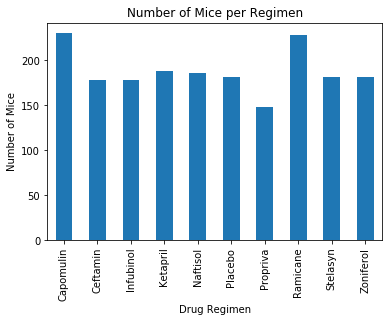

In [151]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_group = clean_df.groupby(["Drug Regimen"])["Mouse ID"].count()
drug_group.plot(kind="bar")

plt.title("Number of Mice per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

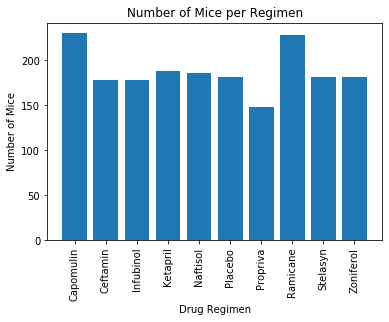

In [152]:
# Import numpy to create ticks
import numpy as np

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Reset index of drug_group
drug_group_reset = drug_group.reset_index()

# Create lists for both Drug Regimen and Mouse ID
treatments = drug_group_reset["Drug Regimen"]
mouse_treatment = drug_group_reset["Mouse ID"]

x_axis = np.arange(len(mouse_treatment))

# Creates the bar chart
plt.bar(x_axis, mouse_treatment, align="center")

# Set locations for x_axis labels
tick_locations = [value for value in x_axis]

# Create the ticks for our bar chart's x axis
plt.xticks(tick_locations, treatments, rotation='vertical')


# Set title and axis labels for bar chart
plt.title("Number of Mice per Regimen")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")

# Show the bar chart
plt.show()



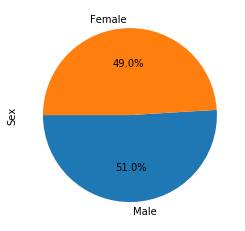

In [153]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_count = clean_df.Sex.value_counts()
gender_count.plot(kind="pie", autopct="%1.1f%%", startangle=180)
plt.show()

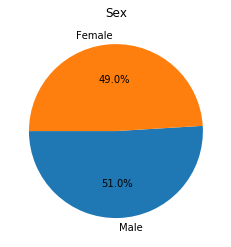

In [154]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create a list with genders for chart
genders = ["Male", "Female"]

# Creates the pie chart using gender_count and genders as labels
plt.pie(gender_count, labels=genders, autopct="%1.1f%%", startangle=180)

# Set titleS
plt.title("Sex")

# Display the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [155]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_time_max = clean_df.groupby(["Mouse ID"], as_index=False)["Timepoint"].max()
mouse_time_max
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_time_max_merge = pd.merge(mouse_time_max, clean_df)
mouse_time_max_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [156]:
# Create a new df that only includes the 4 drug regimens
treat_box_df = mouse_time_max_merge.loc[(mouse_time_max_merge["Drug Regimen"] == "Capomulin") | (mouse_time_max_merge["Drug Regimen"] == "Ramicane") | (mouse_time_max_merge["Drug Regimen"] == "Infubinol") | (mouse_time_max_merge["Drug Regimen"] == "Ceftamin"), :]
treat_box_df



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [157]:
# Calculate iqr, upper bound, and lower bound for each drug regimen
capomulin_quartiles = treat_box_df.loc[(treat_box_df["Drug Regimen"] == "Capomulin")]["Tumor Volume (mm3)"].quantile([.25, .5, .75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq
capomulin_lower_bound = round(capomulin_lowerq - (1.5 * capomulin_iqr),2)
capomulin_upper_bound = round(capomulin_upperq + (1.5 * capomulin_iqr),2)

ramicane_quartiles = treat_box_df.loc[(treat_box_df["Drug Regimen"] == "Ramicane")]["Tumor Volume (mm3)"].quantile([.25, .5, .75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq
ramicane_lower_bound = round(ramicane_lowerq - (1.5 * ramicane_iqr),2)
ramicane_upper_bound = round(ramicane_upperq + (1.5 * ramicane_iqr),2)

infubinol_quartiles = treat_box_df.loc[(treat_box_df["Drug Regimen"] == "Infubinol")]["Tumor Volume (mm3)"].quantile([.25, .5, .75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq
infubinol_lower_bound = round(infubinol_lowerq - (1.5 * infubinol_iqr),2)
infubinol_upper_bound = round(infubinol_upperq + (1.5 * infubinol_iqr),2)

ceftamin_quartiles = treat_box_df.loc[(treat_box_df["Drug Regimen"] == "Ceftamin")]["Tumor Volume (mm3)"].quantile([.25, .5, .75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
ceftamin_lower_bound = round(ceftamin_lowerq - (1.5 * ceftamin_iqr),2)
ceftamin_upper_bound = round(ceftamin_upperq + (1.5 * ceftamin_iqr),2)


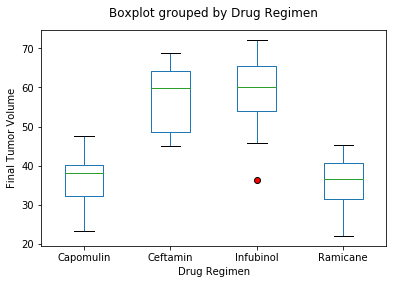

For Capomulin, values above 51.83 and below 20.7 could be outliers.
For Ceftamin, values above 87.67 and below 25.36 could be outliers.
For Infubinol, values above 82.74 and below 36.83 could be outliers.
For Ramicane, values above 54.31 and below 17.91 could be outliers.


,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,25.0,36.667568,5.715188,23.343598,32.377357,38.125164,40.159220,47.685963
Ceftamin,25.0,57.753977,8.365568,45.000000,48.722078,59.851956,64.299830,68.923185
Infubinol,25.0,58.178246,8.602957,36.321346,54.048608,60.165180,65.525743,72.226731
Ramicane,25.0,36.191390,5.671539,22.050126,31.560470,36.561652,40.659006,45.220869


In [163]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_circle = dict(markerfacecolor='r', marker='o')
treat_box_df.boxplot(by='Drug Regimen', column=["Tumor Volume (mm3)"], flierprops=red_circle, grid=False)
plt.title("")
plt.ylabel("Final Tumor Volume")
plt.show()

# Check for outliers
print(f'For Capomulin, values above {capomulin_upper_bound} and below {capomulin_lower_bound} could be outliers.')
print(f'For Ceftamin, values above {ceftamin_upper_bound} and below {ceftamin_lower_bound} could be outliers.')
print(f'For Infubinol, values above {infubinol_upper_bound} and below {infubinol_lower_bound} could be outliers.')
print(f'For Ramicane, values above {ramicane_upper_bound} and below {ramicane_lower_bound} could be outliers.')

# Summary stats to quickly identify if there are outliers in the data
treat_box_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].describe()

In [159]:
# Based on boxplot and summary stats we have at least 1 outlier for Infubinol regimen
infubinol_df = treat_box_df.loc[treat_box_df["Drug Regimen"] == "Infubinol"]
infubinol_outlier = infubinol_df.loc[infubinol_df["Tumor Volume (mm3)"] < infubinol_lower_bound]
infubinol_outlier

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
31,c326,5,Infubinol,Female,18,25,36.321346,0


## Line and Scatter Plots

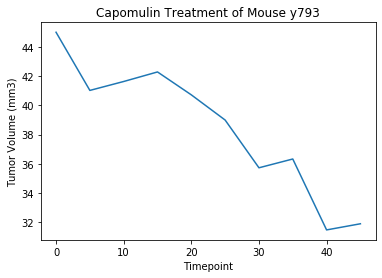

In [160]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Select a mouse to plot data for
capomulin_mouse_df = clean_df.loc[clean_df["Mouse ID"] == "y793"]
capomulin_mouse_df = capomulin_mouse_df[["Timepoint", "Tumor Volume (mm3)"]]

plt.plot(capomulin_mouse_df["Timepoint"],capomulin_mouse_df["Tumor Volume (mm3)"])
plt.title("Capomulin Treatment of Mouse y793")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show;


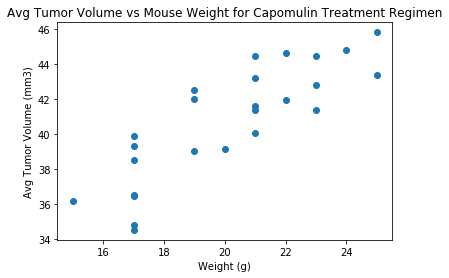

In [161]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_mice = clean_df.loc[clean_df["Drug Regimen"] =="Capomulin"]
avg_tumor_volume = capomulin_mice.groupby(["Mouse ID"],as_index=False)["Tumor Volume (mm3)"].mean()
weight = capomulin_mice[["Mouse ID","Weight (g)"]]
weight = weight.drop_duplicates()
tumor_weight_merge = pd.merge(avg_tumor_volume, weight) 

plt.scatter(tumor_weight_merge["Weight (g)"], tumor_weight_merge["Tumor Volume (mm3)"])

plt.title("Avg Tumor Volume vs Mouse Weight for Capomulin Treatment Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.show()



## Correlation and Regression

The r-squared value between Avg Tumor Volume and Weight is 0.71.


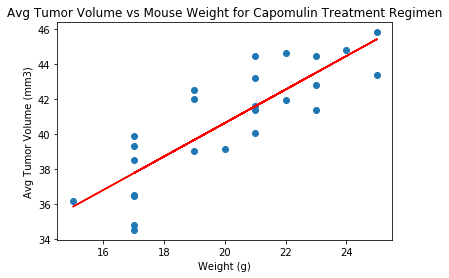

In [173]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Print out the r-squared value along with the plot.
# Import dependencies
from scipy.stats import linregress

x_values = tumor_weight_merge["Weight (g)"]
y_values = tumor_weight_merge["Tumor Volume (mm3)"]

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Generate scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")

# Title and axis labels
plt.title("Avg Tumor Volume vs Mouse Weight for Capomulin Treatment Regimen")
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')

# Disoplay the corelation r squared value
correlation_value = round(rvalue**2,2)
print(f"The r-squared value between Avg Tumor Volume and Weight is {correlation_value}.")

# Show plots
plt.show()

## Observations

1. Male and Female mice were almost equally represented in the study.
2. More mice were given the Capomulin and Ramicane treatment regimen than any other regimen.
3. Capomulin and Ramicane also appear to be the most effective treatment regimens for shrinking tumor size over time and have less variability than Cetramin and Intubinol.